# Final Project for Exploratory Data Analysis for Machine Learning

## Exploratory Data Analysis with Auto-mpg dataset which is about Mileage per gallon performances of various cars.
[Data Source](https://www.kaggle.com/uciml/autompg-dataset)
<br />

<hr />

    Mustafa Tayyip BAYRAM
     November 22, 2021
<hr />
<br />

## Data Set Contents
-   Number of Instances: 398
-   Number of Attributes: 9 including the class attribute
-   Attribute Information:
>-   mpg: continuous
>-   cylinders: multi-valued discrete
>-   displacement: continuous
>-   horsepower: continuous
>-   weight: continuous
>-   acceleration: continuous
>-   model year: multi-valued discrete
>-   origin: multi-valued discrete
>-   car name: string (unique for each instance)
>-   Missing Attribute Values: horsepower has 6 missing values

## Notebook Contents
>-   Data Overview
>-   Data Cleaning and Feature Engineering: Categorical Data
>-   Data Cleaning and Feature Engineering: Numeric Data
>-   Hypothesis Testing

<hr/>

### 1. Packages

In [35]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pyspark.ml.regression import LinearRegression as LR
from sklearn.feature_selection import f_regression as fr
import statsmodels.api as sm

Populating the interactive namespace from numpy and matplotlib


c:\users\tyyp-\appdata\local\programs\python\python38\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['exp2']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### 2.  Read Data

In [36]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### 3. Data Examination and Cleaning

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [38]:
df.dtypes.value_counts()

int64      4
float64    3
object     2
dtype: int64

In [39]:
# Detecting Missing Values
df_na = df.isna().sum().to_frame().sort_values(by = 0, axis = 0)
df_na.rename(columns ={0: 'NA_Count'}, inplace=True)
df_na[df_na['NA_Count'] == 0].index

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

There is no missing value for this subset.

### 4.  Exploration

#### Exploration 1

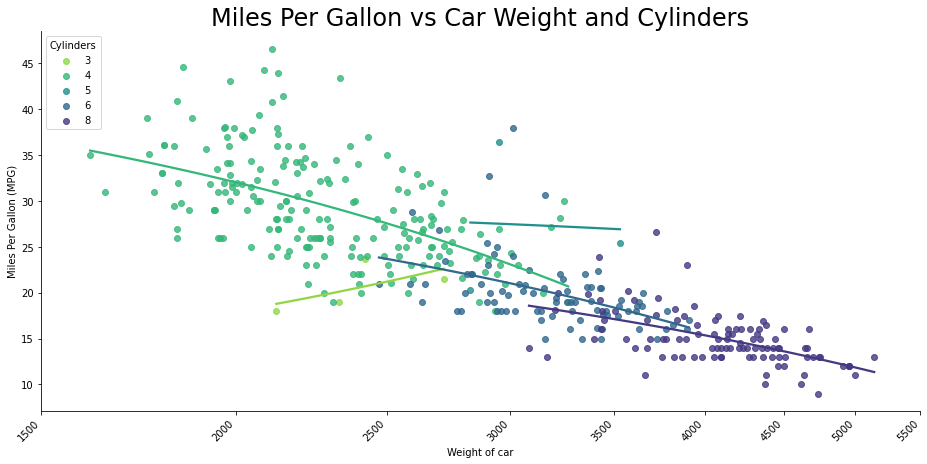

In [40]:
# Scatter Plot
exp1 = sns.lmplot(data= df, x = 'weight', y = 'mpg', hue = 'cylinders', ci= None, palette='viridis_r', height = 6, aspect = 13/6)

ax = plt.gca()
ax.set_title("Miles Per Gallon vs Car Weight and Cylinders",fontsize = 24)

# X axis setup
ax.set_xlabel("Weight of car")
ax.set_xscale('log')
x_labels = [1500, 2000, 2500, 3000, 3500, 4000, 4500,5000,5500]
ax.set_xticks(x_labels)
ax.set_xticklabels(x_labels, rotation = 45, ha = 'right')

# Y axis setup
ax.set_ylabel("Miles Per Gallon (MPG)")

# Legend setup
exp1._legend.remove()
ax.legend(loc = 'upper left', title = 'Cylinders')

#### Exploration 1
MPG is compared to Weight of cars and cylinder number of cars. There is a negative correlation between cylinder number and mpg. Same correlation is exists between MPG and weight of car as well. When we use them together, it will be more precisely. It is not clear to decide according to one of them.

In [41]:
cylinders_carCount = df['cylinders'].value_counts().sort_index().to_frame().rename(columns= {'cylinders': 'Car numbers grouped by Cylinders'})
cylinders_carCount.index.name = "Number of Cylinders"
cylinders_carCount

,Car numbers grouped by Cylinders
Number of Cylinders,
3,4
4,204
5,3
6,84
8,103


#### Exploration 2

In [42]:
# Converting Origin columns which represents by numbers to categorizes
replace_origin = {"origin": {1: "USA", 2: "European", 3: "Japanese"}}
df_original = df
df = df.replace(replace_origin)
df.head()
# Grouping cars with origin

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino


Text(0, 0.5, 'Miles Per Gallon')

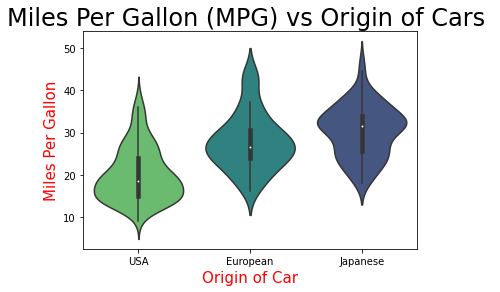

In [43]:

x_labels = df.groupby(['origin'])['mpg'].mean().sort_values().index

exp2 = sns.violinplot(data= df, x = "origin", y = "mpg", scale= 'width', palette='viridis_r', order = x_labels)

ax = plt.gca()
ax.set_title("Miles Per Gallon (MPG) vs Origin of Cars ", fontsize= 24)

# X axis
ax.set_xlabel("Origin of Car", fontsize=15, color="red")
ax.set_xticklabels(ax.get_xticklabels())

# Y axis
ax.set_ylabel("Miles Per Gallon", fontsize=15, color="red")





### Exploration 2
In this exploration, MPG and origin of cars are examined. Origins are represented by violin plots, sort in ascending order by mean of mpg. We can see correlation between origin and mpg but there is overlapping.

#### Exploration 3

Text(0, 0.5, 'Miles Per Gallon')

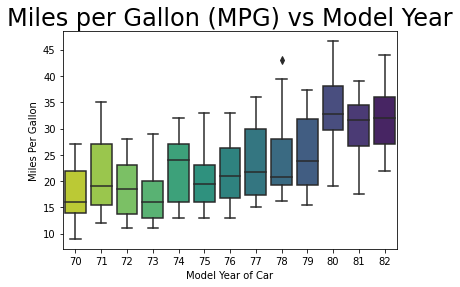

In [44]:
# Boxplot

exp3 = sns.boxplot(data= df, x= 'model year', y='mpg', palette='viridis_r')

ax = plt.gca()

ax.set_title("Miles per Gallon (MPG) vs Model Year", fontsize=24)
# X axis
ax.set_xlabel("Model Year of Car")
ax.set_xticklabels(ax.get_xticklabels())

# Y axis
ax.set_ylabel("Miles Per Gallon")

#### Exploration 3
For the third exploration, MPG  is compared to cars model year. This is a positive correlation. Cars effectiveness are increasing gradually in time but we can't see this with certainty due to the lack of data (sample size) that we have.

### 5.  Hypothesis

####    Hypothesis 1
Cylinder and Weight of car has a negative correlation for MPG.

####    Hypothesis 2
MPG is increasing according to the origin of cars respectively. USA, European, Japanese.

####    Hypothesis 3
MPG has positive effect with the increase of the origin year.

### 6.  Signifiance Test
H0: Origin year doesn't have any effect on MPG
H1: Origin year has an affect on MPG

In [45]:
x = df['model year'].to_numpy().reshape(-1, 1)
y = df['mpg'].to_numpy().reshape(-1, 1)


p_val = fr(x, y)[1][0]


print("The p_value is {}.".format(p_val))


The p_value is 4.844935813317916e-37.


c:\users\tyyp-\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Results
Our p-value is 4.844935813317916e-37. So it is is greater than 0.05. This is not significant at the 95% confidence level. We are not able to reject H0.

### 7. Future Analysis
Determining other variables with a high level of correlation, doing a multiple regression to explain more variance in MPG, and achieving significant results would be the next steps in this analysis.

### 8. Data Summary
Although there are some missing values, the vast majority of this data is was not enough for making good analysis.
analysed